<a href="https://colab.research.google.com/github/Miladatasys/cv-ml-comparison/blob/main/ml_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Construcción del Dataset

## Montaje Drive






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Instalación de librerías

In [ ]:
!pip install opencv-python-headless
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Carga de imágenes con conversión a RGB y separación de canales

Número de imágenes cargadas: 81
Número de etiquetas cargadas: 81


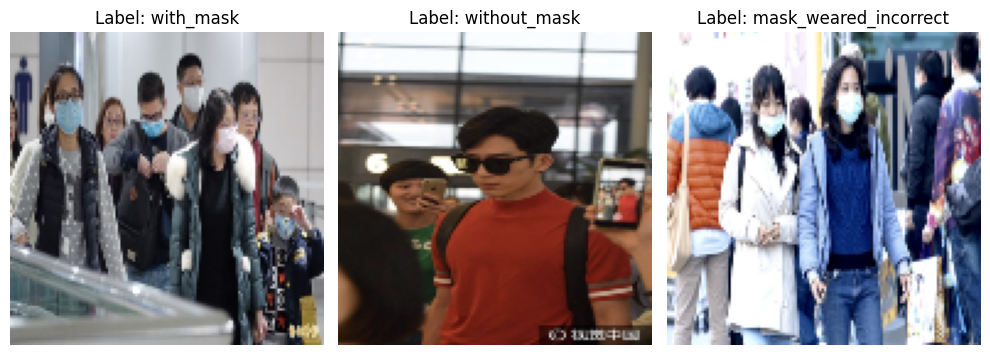

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random  # Módulo random para obtención de imágenes

# Ruta al dataset
dataset_path = '/content/drive/MyDrive/ComputerVision/dataset/'

# Nombre de las clases que existen en el dataset
target_classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']
example_images = {}

# Función para cargar imágenes
def load_images(path, size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                img_path = os.path.join(class_path, file)
                image = cv2.imread(img_path)
                if image is not None:
                    image = cv2.resize(image, size)
                    images.append(image)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas
images, labels = load_images(dataset_path)
print("Número de imágenes cargadas:", len(images))
print("Número de etiquetas cargadas:", len(labels))

# Mostrar una imagen de ejemplo aleatoria de cada clase objetivo
fig, axes = plt.subplots(1, len(target_classes), figsize=(10, 5))
axes = axes.flatten()

for i, target_class in enumerate(target_classes):
    class_indices = [j for j, label in enumerate(labels) if label == target_class]
    if class_indices:
        # Seleccionar un índice aleatorio de las imágenes pertenecientes a esta clase
        random_index = random.choice(class_indices)
        axes[i].imshow(cv2.cvtColor(images[random_index], cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Label: {labels[random_index]}")
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f"No se encontraron ejemplos para: {target_class}", ha='center', va='center')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

# 2.Preprocesamiento con OpenCV

## Operaciones morfológicas

<Figure size 1200x400 with 0 Axes>

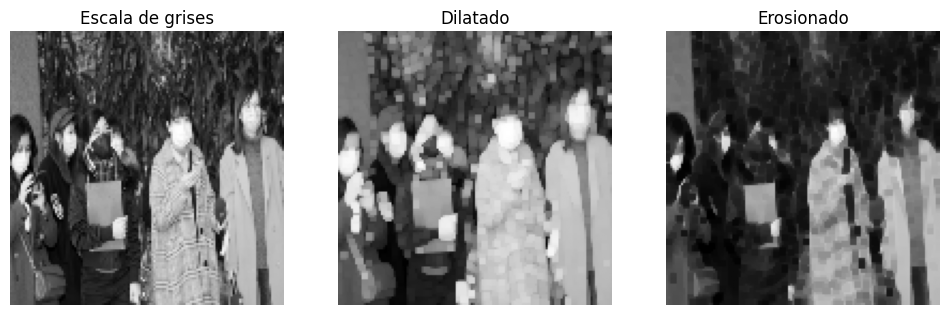

<Figure size 1200x400 with 0 Axes>

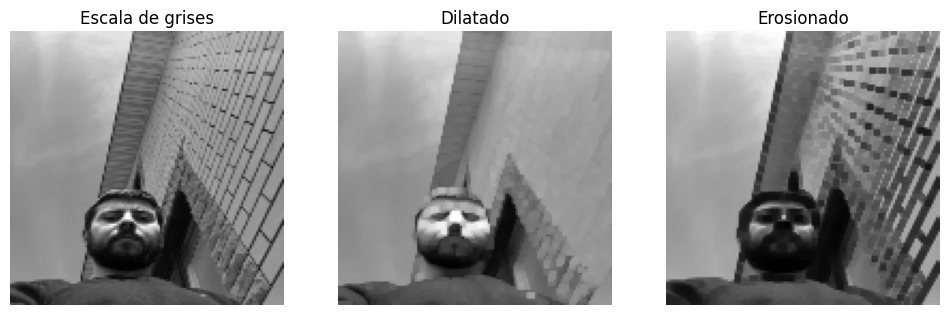

<Figure size 1200x400 with 0 Axes>

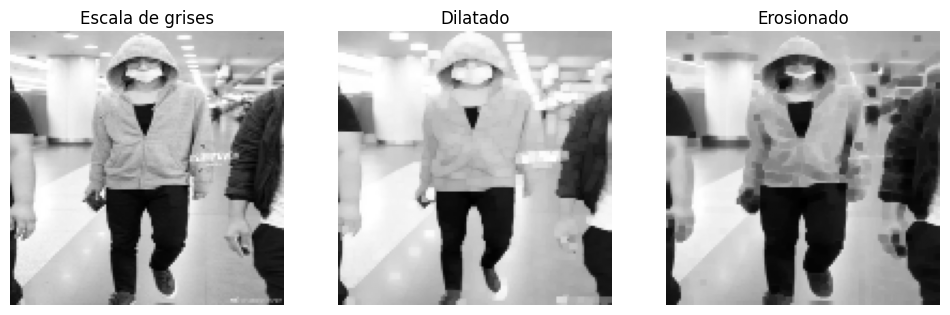

In [ ]:
# Convertir a escala de grises
def apply_morphological_operations(image, kernel_size=(5, 5)):

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((3,3), np.uint8)
  dilated = cv2.dilate(gray, kernel, iterations=1)
  eroded = cv2.erode(gray, kernel, iterations=1)
  return gray, dilated, eroded

# Aplicar operaciones morfologicas a una imagen de cada clase
for cls in target_classes:
  # Seleccionar un índice aleatorio de esta clase
  indexes = [i for i, label in enumerate(labels) if label == cls]
  random_index = random.choice(indexes)
  image = images[random_index]

  # Aplicar morfología
  gray, dilated, eroded = apply_morphological_operations(image)

  # Mostrar

  plt.figure(figsize=(12, 4))
  plt.suptitle(f"Operaciones morfológicas - Clase: {cls}", fontsize=14)

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.imshow(gray, cmap='gray')
  plt.title("Escala de grises")
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(dilated, cmap='gray')
  plt.title("Dilatado")
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(eroded, cmap='gray')
  plt.title("Erosionado")
  plt.axis('off')

  plt.show()

## Filtros convolucionales y segmentación / detección de contornos

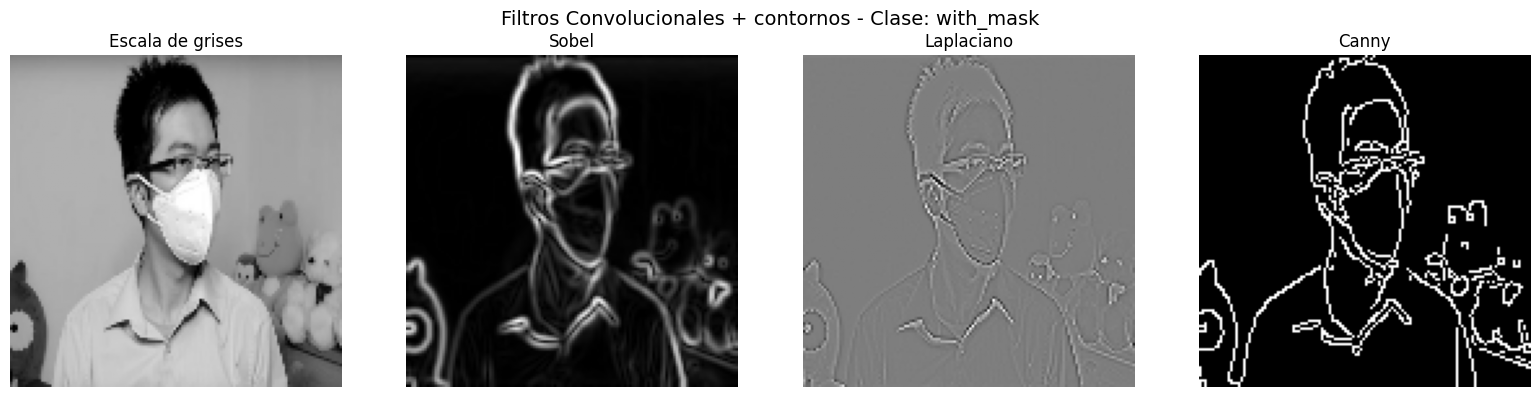

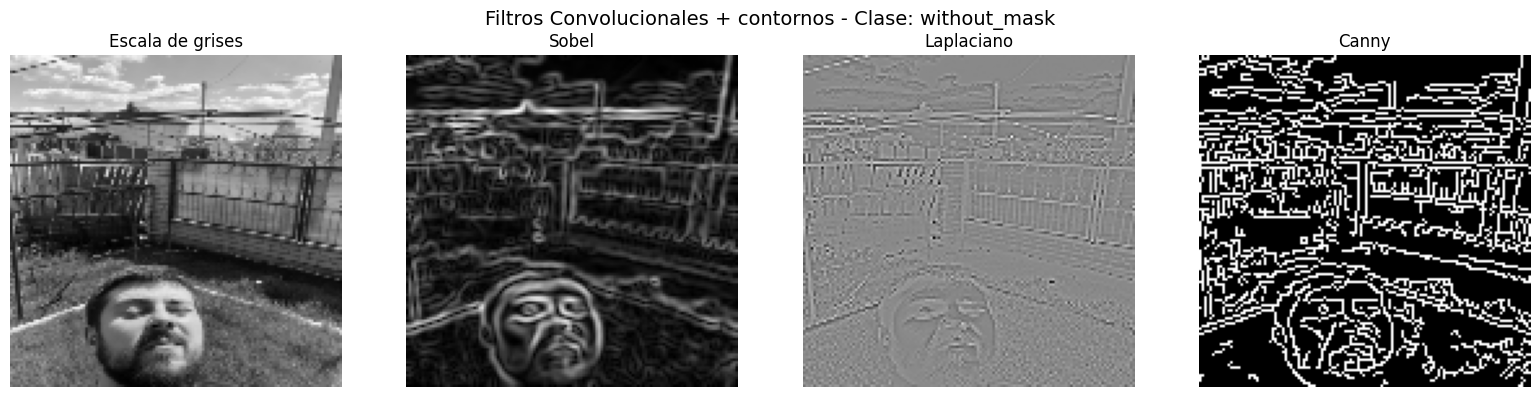

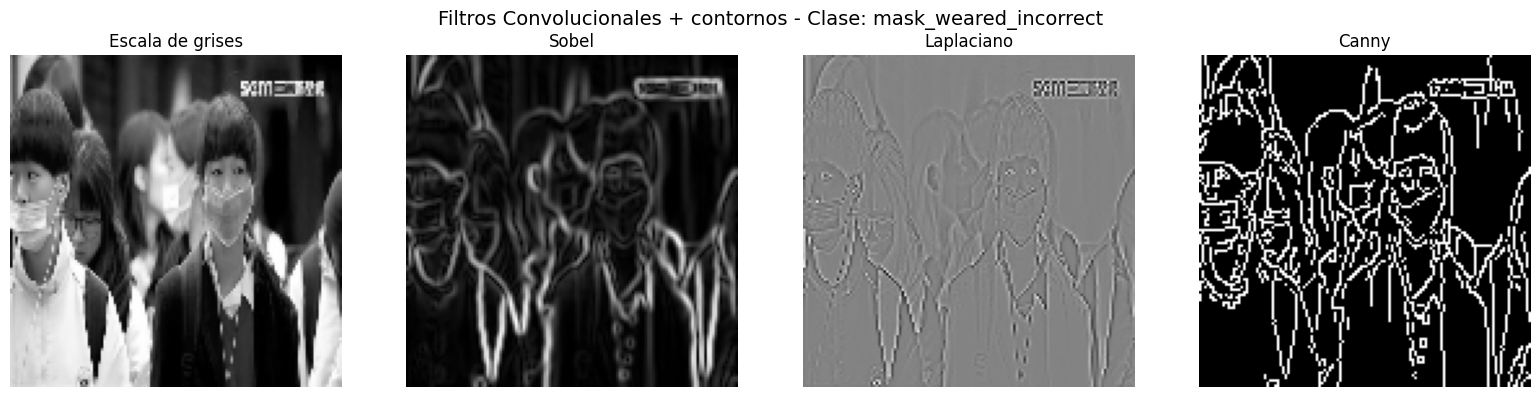

In [ ]:
# Función para aplicar los filtros
def apply_edge_detectors(image):
    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Filtro Sobel
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)  # horizontal
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)  # vertical
    sobel_combined = cv2.magnitude(sobelx, sobely)

    # Filtro Laplaciano
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)

    # Filtro Canny
    canny = cv2.Canny(gray, 100, 200)

    return gray, sobel_combined, laplacian, canny


# Aplicar filtros a una imagen de cada clase
for cls in target_classes:
    # Seleccionar un índice aleatorio de esta clase
    indexes = [i for i, label in enumerate(labels) if label == cls]
    random_index = random.choice(indexes)
    image = images[random_index]

    # Aplicar los filtros
    gray, sobel, laplacian, canny = apply_edge_detectors(image)

    # Detección de contornos
    contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_img = image.copy()
    cv2.drawContours(contoured_img, contours, -1, (0, 255, 0), 2)

    # Mostrar resultados
    plt.figure(figsize=(16, 4))
    plt.suptitle(f"Filtros Convolucionales + contornos - Clase: {cls}", fontsize=14)

    plt.subplot(1, 4, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Escala de grises")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(sobel, cmap='gray')
    plt.title("Sobel")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(laplacian, cmap='gray')
    plt.title("Laplaciano")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(canny, cmap='gray')
    plt.title("Canny")
    plt.axis('off')

    plt.tight_layout()
    plt.show()